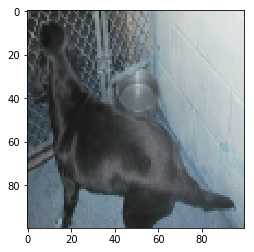

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import cv2
import matplotlib.pyplot as plt
direc = "/kaggle/input/cats-and-dogs-sentdex-tutorial/PetImages/"
categories = ['Dog', 'Cat']
for category in categories:
    path = os.path.join(direc, category)
    for img in os.listdir(path):
        img_read = cv2.imread(os.path.join(path, img))
        new_read = cv2.resize(img_read, (100, 100))
        plt.imshow(new_read)
        break
    break
# Any results you write to the current directory are saved as output.

In [2]:
#load training_data
training_data = []
SIZE = 100   #fix the size for all images
for category in categories:
    path = os.path.join(direc, category)
    class_num = categories.index(category)
    for img in os.listdir(path):
        try:
            img_read = cv2.imread(os.path.join(path, img))
            new_read = cv2.resize(img_read, (SIZE, SIZE))
            training_data.append([new_read, class_num])
        except Exception as e:
            pass

print(len(training_data))

24946


In [3]:
#Now shuffle the training data
import random
random.shuffle(training_data)

In [4]:
x = []
y = []
for features, label in training_data:
    x.append(features)
    y.append(label)

print(str(len(x)) + "  |  " + str(len(y)))

24946  |  24946


(24946, 100, 100, 3)
(24946,)


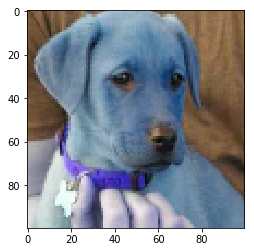

In [5]:
x = np.array(x).reshape(-1, SIZE, SIZE, 3)
print(x.shape)
y = np.array(y)
print(y.shape)
X = x/255.0
plt.imshow(X[0])

In [6]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization, Dropout
print('using Tensorflow with Keras')

using Tensorflow with Keras


Using TensorFlow backend.


In [7]:
model = Sequential()
model.add(Conv2D(64, (3,3), kernel_initializer = 'he_normal', input_shape = X.shape[1:]))
model.add(BatchNormalization(axis = -1))
model.add(Activation('relu'))
model.add(MaxPooling2D((3,3), strides = (2,2)))
model.add(Dropout(rate = 0.5))

model.add(Conv2D(128, (3,3), kernel_initializer = 'he_normal'))
model.add(BatchNormalization(axis = -1))
model.add(Activation('relu'))
model.add(MaxPooling2D((3,3), strides = (2,2)))
model.add(Dropout(rate = 0.5))

model.add(Conv2D(256, (3,3), kernel_initializer = 'he_normal'))
model.add(BatchNormalization(axis = -1))
model.add(Activation('relu'))
model.add(MaxPooling2D((3,3), strides = (2,2)))
model.add(Dropout(rate = 0.5))

model.add(Conv2D(512, (3,3), kernel_initializer = 'he_normal'))
model.add(BatchNormalization(axis = -1))
model.add(Activation('relu'))
model.add(MaxPooling2D((3,3), strides = (2,2)))
model.add(Dropout(rate = 0.5))

model.add(Flatten())
model.add(Dense(1024, use_bias = True))
model.add(Activation('relu'))
model.add(Dropout(rate = 0.5))

model.add(Dense(512, use_bias = True))
model.add(Activation('relu'))

model.add(Dense(128, use_bias = True))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(X, y, batch_size = 64, epochs = 50, validation_split = 0.1)

Train on 22451 samples, validate on 2495 samples
Epoch 1/50
22451/22451 [==============================] - 33s 1ms/step - loss: 0.7291 - accuracy: 0.5865 - val_loss: 0.7766 - val_accuracy: 0.5018
Epoch 2/50
22451/22451 [==============================] - 27s 1ms/step - loss: 0.5968 - accuracy: 0.6832 - val_loss: 1.0039 - val_accuracy: 0.5022
Epoch 3/50
22451/22451 [==============================] - 27s 1ms/step - loss: 0.5148 - accuracy: 0.7509 - val_loss: 1.2323 - val_accuracy: 0.5110
Epoch 4/50
22451/22451 [==============================] - 27s 1ms/step - loss: 0.4589 - accuracy: 0.7866 - val_loss: 0.5277 - val_accuracy: 0.7058
Epoch 5/50
22451/22451 [==============================] - 27s 1ms/step - loss: 0.4129 - accuracy: 0.8140 - val_loss: 0.6003 - val_accuracy: 0.7090
Epoch 6/50
22451/22451 [==============================] - 27s 1ms/step - loss: 0.3738 - accuracy: 0.8368 - val_loss: 0.8764 - val_accuracy: 0.5944
Epoch 7/50
22451/22451 [==============================] - 27s 1ms/ste

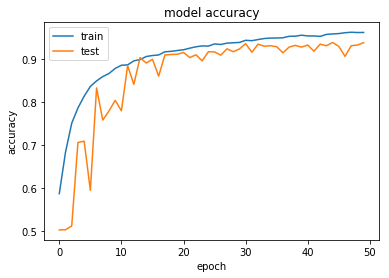

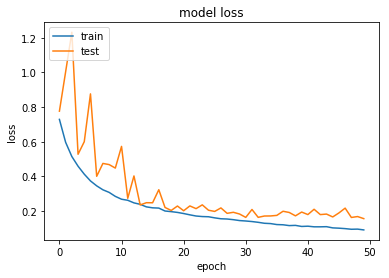

In [8]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [9]:
#test dataset
test_data = []
direc = "/kaggle/input/cat-and-dog/test_set/test_set"
categories = ['dogs', 'cats']
SIZE = 100   #fix the size for all images
for category in categories:
    path = os.path.join(direc, category)
    class_num = categories.index(category)
    for img in os.listdir(path):
        try:
            img_read = cv2.imread(os.path.join(path, img))
            new_read = cv2.resize(img_read, (SIZE, SIZE))
            test_data.append([new_read, class_num])
        except Exception as e:
            pass

print(len(test_data))
    

2023


(2023, 100, 100, 3)
(2023,)


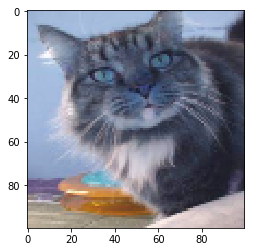

In [10]:
random.shuffle(test_data)
test_x = []
test_y = []
for features, label in test_data:
    test_x.append(features)
    test_y.append(label)
test_x = np.array(test_x).reshape(-1, SIZE, SIZE, 3)
print(test_x.shape)
test_y = np.array(test_y)
print(test_y.shape)
test_x = test_x/255.0
plt.imshow(test_x[0])

In [11]:
val_loss, val_accu = model.evaluate(test_x, test_y)
print(val_loss)
print(val_accu)

2023/2023 [==============================] - 1s 471us/step
0.06674030274742025
0.9747899174690247


Classifier trained on <b>22451</b> samples, validated on <b>2495</b> samples and tested on <b>2023</b> samples<br>
train_accuracy = <b>96.00</b><br>
dev_accuracy = <b>93.55</b><br>
Test_accuracy = <b>97.16</b><br>
for better results use <b>data augmentation</b> 

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 64)        1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 98, 98, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 98, 98, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 128)       73856     
_________________________________________________________________
batch_normalization_2 (Batch (None, 46, 46, 128)      

In [13]:
model.save("/kaggle/working/catvsdog.h5")
print('Saved Successfully')

Saved Successfully
